In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm, datasets
import sklearn
import sklearn.inspection
from matplotlib.lines import Line2D
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import dice_ml
from dice_ml.utils import helpers
import pandas as pd

In [2]:
# Create dataset
X = np.array([
    [0.715, -0.28728070175438597],
    [1.425, -1.8712406015037595],
    [1.065, -1.7709899749373434],
    [0.595, -1.6506892230576442],
    [0.465, -1.4000626566416041],
    [0.785, -1.3900375939849625],
    [0.815, -1.630639097744361],
    [0.805, -1.8211152882205515],
    [0.365, -1.7609649122807018],
    [0.195, -1.2296365914786966],
    [0.455, -1.2095864661654134],
    [0.685, -1.1795112781954886],
    [0.755, -0.7584586466165414],
    [0.255, -0.28728070175438597],
    [0.515, -0.1168546365914787],
    [0.325, -0.5780075187969925],
    [0.335, -0.9689849624060151],
    [0.765, -0.5579573934837093],
    [0.915, -0.5379072681704261],
    [0.945, -0.6481829573934837],
    [0.865, -0.17700501253132833],
    [1.245, -1.119360902255639],
    [1.355, -1.1995614035087718],
    [1.585, -1.4501879699248121],
    [1.775, -1.6907894736842106],
    [1.595, -1.7609649122807018],
    [1.365, -1.6406641604010026],
    [1.325, -0.9288847117794486],
    [1.475, -0.6381578947368421],
    [1.715, -0.3674812030075188],
    [2.225, -0.6080827067669173],
    [1.875, -0.8787593984962406],
    [1.605, -1.1093358395989974],
    [2.015, -1.269736842105263],
    [2.355, -1.0491854636591478],
    [2.125, -0.49780701754385964],
    [1.775, -0.1068295739348371],
    [1.265, -0.16697994987468673],
    [0.945, -0.16697994987468673],
    [1.285, -0.45770676691729323],
    [2.145, -1.6206140350877194],
    [2.145, -0.9990601503759399]]
)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [3]:
# Build a dataframe because DiCE requires one
df = pd.DataFrame({'x_1': X[:, 0], 'x_2': X[:, 1], 'y': y})

print("Synthetic dataset:")
print(df.head())

Synthetic dataset:
     x_1       x_2  y
0  0.715 -0.287281  0
1  1.425 -1.871241  0
2  1.065 -1.770990  0
3  0.595 -1.650689  0
4  0.465 -1.400063  0


In [4]:
# Construct DiCE data
d = dice_ml.Data(dataframe=df, continuous_features=['x_1', 'x_2'], outcome_name='y')

In [5]:
# Build and fit the model
svc = svm.SVC(kernel="poly", degree=5, gamma="auto", C=1.0, probability=True)

clf = Pipeline(steps=[('classifier', svc)])
model = clf.fit(df[["x_1", "x_2"]], y)

In [6]:
# Test the prediction
clf.predict(pd.DataFrame({'x_1': [1], 'x_2': [1]}))

array([0])

In [7]:
# Build the DiCE model and explanation object
m = dice_ml.Model(model=model, backend="sklearn")
exp = dice_ml.Dice(d, m, method="random")

In [23]:
# Generate three counterfactuals for a given x and visualize them
x = pd.DataFrame({'x_1': [0.6], 'x_2': [-1]})

e1 = exp.generate_counterfactuals(x, total_CFs=3, desired_class="opposite")
e1.visualize_as_dataframe(show_only_changes=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.28it/s]

Query instance (original outcome : 0)


,x_1,x_2,y
0,0.6,-1.0,0



Diverse Counterfactual set (new outcome: 1.0)


,x_1,x_2,y
0,1.778,-,1.0
1,2.165,-,1.0
2,2.05,-1.57198973,1.0


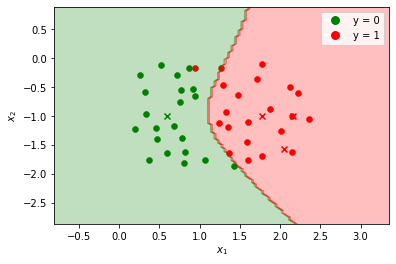

In [24]:
# Plot the counterfactuals
fig, ax = plt.subplots()

for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], color="green" if y[i] == 0 else "red", label="y=0" if y[i] == 0 else "y=1", linewidths=0.5)

    
plt.scatter(0.6, -1, color="green", marker="x")
plt.scatter(1.778, -1, color="red", marker="x")
plt.scatter(2.165, -1, color="red", marker="x")
plt.scatter(2.05, -1.57198973, color="red", marker="x")

legend_elements = [Line2D([0], [0], marker='o', color='w', label='y = 0', markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='y = 1', markerfacecolor='r', markersize=10)]
plt.legend(handles=legend_elements)

sklearn.inspection.DecisionBoundaryDisplay.from_estimator(
        model,
        df[["x_1", "x_2"]],
        response_method="predict",
        cmap=matplotlib.colors.ListedColormap(["green", "red"]),
        alpha=0.25,
        ax=ax,
        xlabel="$x_1$",
        ylabel="$x_2$",
    )

# plt.savefig("cf.svg")